In [156]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib as mpl
from scipy.fftpack import dct
mpl.rcParams['figure.dpi'] = 300

In [157]:
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

(-0.5, 1364.5, 1705.5, -0.5)

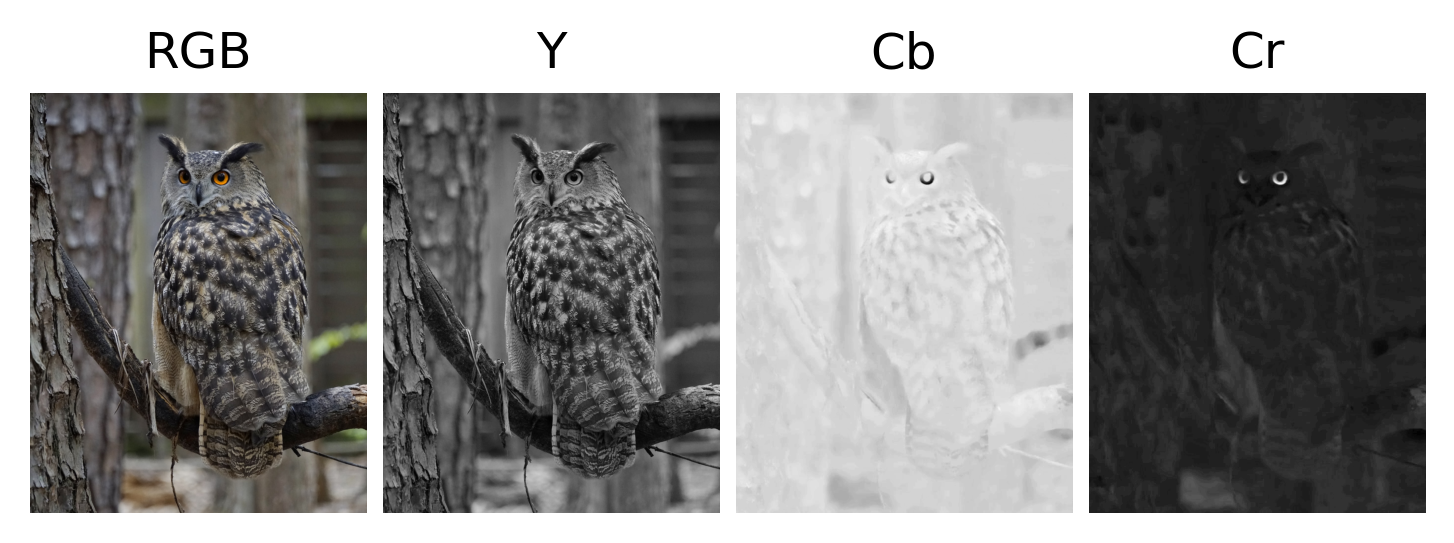

In [158]:
img_bgr = cv2.imread('./owl.jpg')
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_ycbcr = rgb2ycbcr(img_rgb)
plt.subplots_adjust(wspace= .05)

ax = plt.subplot(141)
ax.axis('off')
ax.imshow(img_rgb)
ax.set_title('RGB')

ax = plt.subplot(142)
ax.imshow(img_ycbcr[:,:,0],cmap='gray')
ax.set_title('Y')
ax.axis('off')

ax = plt.subplot(143)
ax.imshow(img_ycbcr[:,:,1],cmap='gray')
ax.set_title('Cb')
ax.axis('off')

ax = plt.subplot(144)
ax.imshow(img_ycbcr[:,:,2],cmap='gray')
ax.set_title('Cr')
ax.axis('off')

Text(0.5, 1.0, 'Cb')

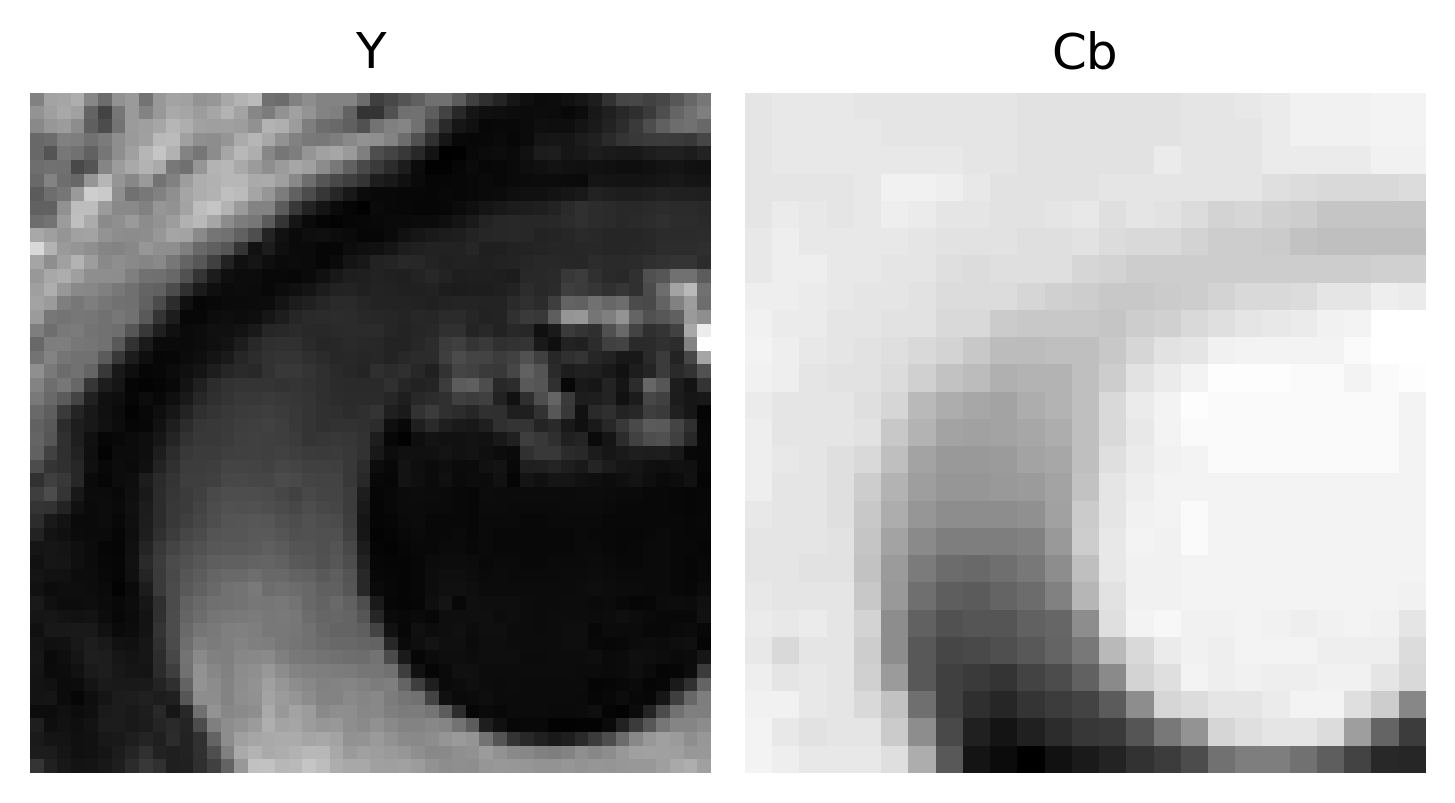

In [159]:
plt.subplots_adjust(wspace= .05)
startX = 735
startY = 315
widthWindow = heightWindow = 50

ax = plt.subplot(121)
ax.axis('off')
ax.imshow(img_ycbcr[startY:startY+heightWindow,startX:startX+widthWindow,0],cmap='gray')
ax.set_title('Y')

ax = plt.subplot(122)
ax.axis('off')
ax.imshow(img_ycbcr[startY:startY+heightWindow:2,startX:startX+widthWindow:2,1],cmap='gray')
ax.set_title('Cb')

In [160]:
arr = np.array([[255]*4]*4)
arr = print(dct(dct(arr, norm='ortho').T, norm='ortho'))


[[1020.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [   0.    0.    0.    0.]]
